# Random Forest

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

dataset = pd.read_csv('datasets/Social_Network_Ads.csv')

In [2]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X = dataset.iloc[:, [2,3]].values.astype("float32")
y = dataset.iloc[:, 4].values.astype("float32")

In [4]:
# dataset 을 Training 과 Test set 으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)
print(X_train.shape)

(320, 2)


In [6]:
# Training set 에 대해 Random Forest Classifier model 을 fitting
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [7]:
y_pred = classifier.predict(X_test)

print(y_pred)
print()
print("Test set true counts = ", sum(y_test))
print("predicted true counts = ", sum(y_pred))
print("accuracy = {:.2f}".format(sum(y_pred == y_test) / len(y_test)))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 1.]

Test set true counts =  22.0
predicted true counts =  23.0
accuracy = 0.91


In [8]:
# making confusion matrix
print("confution matrix\n", confusion_matrix(y_test, y_pred, labels=[1, 0]))
print()
print("f1 score\n", f1_score(y_test, y_pred, labels=[1, 0]))

confution matrix
 [[19  3]
 [ 4 54]]

f1 score
 0.8444444444444444


### Visualization of the Training result

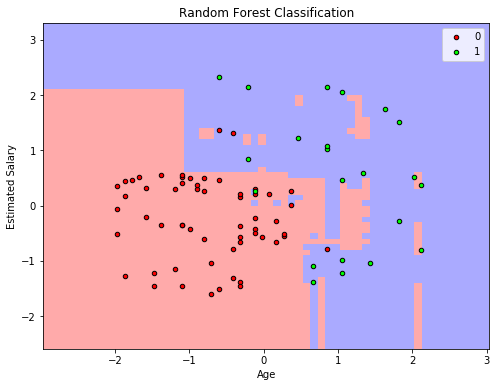

In [14]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(8, 6))

x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1       
x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1     

X1, X2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))

XX = np.column_stack([X1.ravel(), X2.ravel()])

Y = np.array(classifier.predict(XX)).reshape(X1.shape)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])   #rgb(255, 170, 170), rgb(170, 255, 170), rgb(170, 170, 255)
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])    #rgb(255,0,0), rgb(0,255,0), rgb(0,0,255)

plt.pcolormesh(X1, X2, Y, cmap=cmap_light)    # 결정경계 표시

# real data
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], s=20, color=cmap_bold(0), label=0, edgecolor='k')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], s=20, color=cmap_bold(1), label=1, edgecolor='k')

plt.title('Random Forest Classification')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Gradient Boosting Classifier

- min_samples_split : node 분리에 필요한 최소 sample 수 => overfitting 방지  
- max_depth : tree 깊이 조절 => overfitting 방지
- learning_rate : 각 tree 의 기여도 조정, n_estimators 와 trade-off 
- n_estimators : number of sequential trees

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

gbclassifier = GradientBoostingClassifier(learning_rate=0.1, n_estimators=500, max_depth=5)
gbclassifier.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [11]:
y_pred = gbclassifier.predict(X_test)

print(y_pred)
print()
print("Test set true counts = ", sum(y_test))
print("predicted true counts = ", sum(y_pred))
print("accuracy = {:.2f}".format(sum(y_pred == y_test) / len(y_test)))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 1.]

Test set true counts =  22.0
predicted true counts =  21.0
accuracy = 0.94


In [12]:
# making confusion matrix
print("confution matrix\n", confusion_matrix(y_test, y_pred, labels=[1, 0]))
print()
print("f1 score\n", f1_score(y_test, y_pred, labels=[1, 0]))

confution matrix
 [[19  3]
 [ 2 56]]

f1 score
 0.8837209302325582


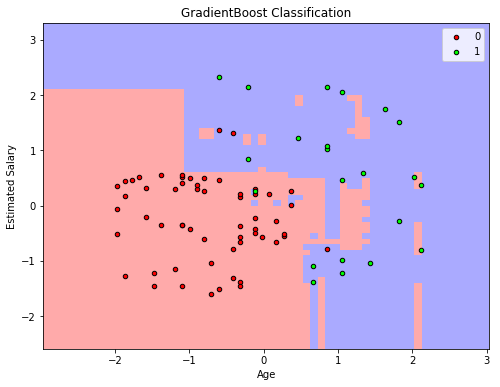

In [13]:
plt.figure(figsize=(8, 6))

x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1       
x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1     

X1, X2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))

XX = np.column_stack([X1.ravel(), X2.ravel()])

Y = np.array(classifier.predict(XX)).reshape(X1.shape)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])   #rgb(255, 170, 170), rgb(170, 255, 170), rgb(170, 170, 255)
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])    #rgb(255,0,0), rgb(0,255,0), rgb(0,0,255)

plt.pcolormesh(X1, X2, Y, cmap=cmap_light)    # 결정경계 표시

# real data
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], s=20, color=cmap_bold(0), label=0, edgecolor='k')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], s=20, color=cmap_bold(1), label=1, edgecolor='k')

plt.title('GradientBoost Classification')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [15]:
gbclassifier.feature_importances_       # Age, EstimatedSalary 의 중요도

array([0.49411163, 0.50588837])

In [16]:
feature_imp = pd.Series(gbclassifier.feature_importances_, ['Age', 'EstimatedSalary']).sort_values(ascending=False)
feature_imp

EstimatedSalary    0.505888
Age                0.494112
dtype: float64

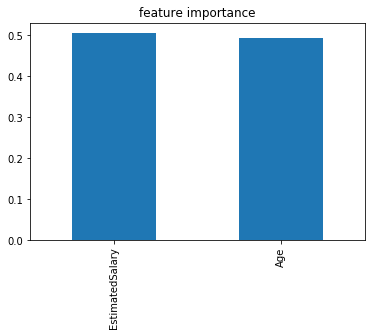

In [17]:
feature_imp.plot(kind='bar', title='feature importance')

# 실습 - Gradient Boosting 을 이용한 Titanic 호의 생존 예측

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df_titanic = pd.read_csv("datasets/titanic.csv")

In [ ]:
df_titanic.head()

In [ ]:
df_titanic.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [ ]:
mean_age = df_titanic['Age'].mean()

In [ ]:
df_titanic['Age'].fillna(mean_age, inplace=True)

### categorical 변수의 수치화

In [ ]:
df_titanic = pd.get_dummies(df_titanic)

In [ ]:
df_titanic.head()

### feature, label 분리

In [ ]:
Y = df_titanic['Survived']
X = df_titanic.drop(['Survived'], axis=1)

In [ ]:
# train / test split

In [ ]:
# Gradient Boosting Classifier

In [ ]:
# your codes below